<a href="https://colab.research.google.com/github/TFITZ57/FINTECH_Project_2/blob/main/Collab_Final_LSTM_boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OUTLINE

## Step 1
#### Determine datasets to be included

Basic Price Information:

- BTC Price (USD): Bitcoin price in USD.
- ETH Price (USD): Ethereum price in USD.
- DOGE Price (USD): Dogecoin price in USD.
  
Blockchain Activity Metrics:

- Active Addresses: Number of active addresses.
- Transaction Count: Number of transactions.
- Transaction Value (USD): Total value of transactions in USD.
- Block Difficulty: Difficulty of the latest block mined.
- Total Fees (USD): Total transaction fees in USD.

Mining and Revenue Metrics:

- Revenue (USD): Revenue from mining.
- HashRate: Total computational power used in the network.
- HashPrice (USD): Cost of mining per hash.
- Miner Supply (BTC): Amount of Bitcoin held by miners.
- Miner Supply (USD): Value of Bitcoin held by miners in USD.

Market and Economic Indicators:

- SOPR: Spent Output Profit Ratio, an indicator of overall market profit and loss.
- MVRV Ratio: Market Value to Realized Value ratio.
- Rev. Puell Multiple: Revenue multiple that indicates mining revenue relative to its historical average.

- Volatility and Network Flows:
  
- Realized Volatility (24h), (30d), and (7d): Measures of volatility over different periods.
- Miner Netflows from Exchanges(BTC): Net flow of Bitcoin from/to miners to/from exchanges.
- Exchange Netflows Excl. Ex<->Ex(USD): Net flow of funds excluding exchanges.

Lagged Price Data:

- Various lag_ fields for BTC, ETH, and DOGE prices, showing past values which can be used for time-series analysis or forecasting.
- Statistical Means and Standard Deviations:
- Moving averages and standard deviations over 7 days for BTC, ETH, and DOGE prices.

Wavelet Exctracted Features:

- Denoising
- Features

## Step 2
### Data preprocessing and Feature Engineering

_____________
_____________
Data cleaning:
- Handle missing values
  - imputation
  - forward/backward filling
- Identify and remove Outlliers
- Noise reduction
_____________
Feature Engineering:
- Decompose Timestamps
- Lagged features
- Rolling Window statistics
- TA indicators
_____________
Data Transformation:
- Normalize/Standardize data
- Differencing
_____________
_____________
Sequence Creation:
- Fixed Window Sequencing: Transform the time series data into sequences that the LSTM can process.
- Overlap: You can choose to have overlapping windows (e.g., shift one time step for the next sequence) to increase the density of the training data
_____________
Train/Test Split:
- Ensure that the split between training and testing data respects the temporal order of observations
- Avoid random splits as they can introduce future leakage into the training set
_____________
Batch Size and Sequence Padding:
- Batch Size: Opt for a smaller batch size if you encounter memory issues or if you want to potentially benefit from the noise added by stochastic gradient descent during trainin
- Padding: If using batches, ensure all sequences in a batch are of the same length through padding. However, be mindful of how much padding you add as excessive padding can dilute the signal with noise
_____________
Robust Validation Strategy:
- Time Series Cross-Validation: Use techniques like forward chaining, where successive training sets are supersets of those that come before them. This mimics real-world scenarios and provides a robust estimate of the model’s performance
_____________
_____________


## Step 3
### Model Build and Evaluation

_____________
_____________
Model Architecture:
- Number of Layers: Start with one or two LSTM layers. Increasing the number of layers can help the model learn more complex patterns but can also lead to overfitting and increased computational cost.
- Number of Units: The number of units in each LSTM layer should be chosen based on the complexity of the problem. More units can capture more complex structures but may also overfit.
- Bidirectional LSTMs: Consider using bidirectional LSTMs if the context from future steps provides useful information for the model.
_____________
Regularization:
- Dropout: Use dropout in LSTM layers to prevent overfitting. Typically, dropout is applied to the inputs and/or the recurrent connections of the LSTM units.
- Recurrent Dropout: This is a specific form of dropout used in LSTM layers to drop units in the recurrent connections, which can help in regularizing the model further.
_____________
Optimizer and Learning Rate:
- Optimizer: Common choices for LSTM models include Adam or RMSprop, as they are more capable of handling the vanishing gradient problem in long sequences compared to SGD (Stochastic Gradient Descent).
- Learning Rate: Choosing the right learning rate is crucial. Use learning rate schedules or adaptive learning rate methods like learning rate decay to optimize this parameter dynamically during training.
_____________
Loss Function:
- Choose the loss function according to the nature of your prediction task:
  - For regression tasks, mean squared error (MSE) or mean absolute error (MAE) are common.
  - For classification, binary cross-entropy (for binary classification) or categorical cross-entropy (for multi-class classification) are typical choices.
_____________
Training Strategies:
- Early Stopping: Use early stopping to halt training when the model's performance on a validation set stops improving, preventing overfitting.
- Gradient Clipping: This technique limits the size of the gradients to a defined range or norm, which can prevent the exploding gradient problem in LSTMs.
_____________
Evaluation:
- Use a separate validation set to tune the parameters of your LSTM model. It’s crucial to have a test set that has not been seen during the model development phase to evaluate the model's performance.
_____________
 Iterative Refinement:
- Continuously refine the model based on feedback from real-world use or additional validation, adjusting aspects like the architecture, training duration, and input features.
_____________
_____________

## Step 4
### Implement Boosted LSTM & Best Practices

_____________
_____________
Base Model Training:
- Begin by training an initial LSTM model on the dataset.
- Compute the residuals or errors (difference between the predicted and actual values).
_____________
Sequential Training:
- Train additional LSTM models on the residuals of the previous models.
- Each model focuses on learning the patterns missed by its predecessors.
_____________
Aggregation of Predictions:
- Combine the predictions of all LSTM models, typically by weighted averaging, where weights can be determined based on the performance of each model on a validation dataset.
_____________
_____________

Model Complexity:
- Carefully choose the complexity of each LSTM in the ensemble. Too complex models might overfit, especially in later stages where the focus is on fitting residuals.
_____________
Learning Rate Adjustments:
- Adjust the learning rates for each subsequent LSTM. Later models might benefit from lower learning rates to fine-tune the predictions on residuals.
_____________
Regularization Techniques:
- Use dropout, recurrent dropout, and possibly L1/L2 regularization to prevent overfitting, especially since boosting can increase the risk of overfitting by focusing too narrowly on specific aspects of the dataset.
_____________
Early Stopping:
- Implement early stopping during training of each LSTM model to avoid overfitting on noise in the residuals.
_____________
Error Monitoring:
- Continuously monitor the error patterns; if subsequent models do not significantly improve the predictions, consider stopping the addition of new models to the ensemble.
_____________
Diverse Initialization:
- Initialize each LSTM model differently to promote model diversity, which is key to the success of ensemble methods.
_____________
_____________

# Load API and Dependencies

##### Imports

In [1]:
!pip install coinmetrics-api_client
!pip install keras_tuner
!pip install -U kaleido

#IMPORTS
import os
import pywt
import json
import logging
import requests
import datetime
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
from os import environ
from pathlib import Path
import plotly.express as px
# from dotenv import load_dotenv
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from concurrent.futures import ProcessPoolExecutor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from dateutil.relativedelta import relativedelta
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from coinmetrics.api_client import CoinMetricsClient
from sklearn.feature_selection import mutual_info_regression

import tensorflow as tf
import keras_tuner as kt
from tensorflow import keras
from keras_tuner import Hyperband
from keras.optimizers import Adam
from keras_tuner import HyperModel
from keras.models import Sequential
from keras.callbacks import Callback
from keras_tuner import RandomSearch
from keras.callbacks import LambdaCallback
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.regularizers import l2
from keras.layers import LSTM, Dropout, Dense
from keras_tuner.tuners import BayesianOptimization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import TimeSeriesSplit


tf.random.set_seed(0)
np.random.seed(0)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 510.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: typer
    Found existing installation: typer 0.9.4
    Uninstalling typer-0.9.4:
      Successfully uninstalled typer-0.9.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.5 MB/s eta 0:00:00


##### API

In [2]:
#API VARIABLES

try:
    cm_api_key = environ["COIN_METRICS_API_KEY"]
    logging.info('API Key Found')
except KeyError:
    cm_api_key = ""
    logging.info('API Key Not Found')

#instantiate the client
client = CoinMetricsClient('ZNuhTAPPhlXlgdsmNvTx')

In [3]:
# QUERY API FOR BTC METRICS

btc_metrics = ['PriceUSD',
               'AdrActCnt', 'SOPR',
               'TxCnt', 'TxTfrValUSD',
               'CapMVRVCur', 'DiffLast', 'FeeTotUSD',
               'FlowMinerIn0HopAllExNtv', 'FlowMinerOut0HopAllExNtv',
               'FlowMinerIn0HopAllNtv', 'FlowMinerOut0HopAllNtv',
               'FlowMinerIn0HopAllExUSD', 'FlowMinerOut0HopAllExUSD',
               'FlowMinerIn0HopAllUSD', 'FlowMinerOut0HopAllUSD',
               'FlowInExInclNtv', 'FlowOutExInclNtv',
               'FlowInExNtv', 'FlowOutExNtv',
               'FlowInExInclUSD', 'FlowOutExInclUSD',
               'FlowInExUSD', 'FlowOutExUSD',
               'RevUSD', 'PuellMulRev',
               'MCRC', 'MCTC', 'MOMR',
               'HashRate', 'RevHashUSD', 'RevHash1yAvgUSD',
               'SplyMiner0HopAllNtv', 'SplyMiner0HopAllUSD',
               'volume_reported_spot_usd_1d', 'volatility_realized_usd_rolling_24h',
               'volatility_realized_usd_rolling_30d', 'volatility_realized_usd_rolling_7d']
frequency = '1d'
start_time = '2014-01-01'

btc_metrics_df = client.get_asset_metrics(assets='btc',
                                          metrics=btc_metrics,
                                          start_time=start_time,
                                          frequency=frequency,
                                          end_inclusive=False,
                                          page_size=1000).parallel(
                                              time_increment=relativedelta(months=9)
                                          ).to_dataframe(optimize_pandas_types=False)

btc_metrics_df = btc_metrics_df.set_index('time')
btc_metrics_df.index = pd.to_datetime(btc_metrics_df.index.date)

eth_price = client.get_asset_metrics(assets='eth',
                                     metrics='PriceUSD',
                                     start_time=start_time,
                                     frequency=frequency,
                                     end_inclusive=False,
                                     page_size=1000).parallel(
                                         time_increment=relativedelta(months=6)
                                     ).to_dataframe(optimize_pandas_types=False)

eth_price = eth_price.set_index('time')
eth_price.index = pd.to_datetime(eth_price.index.date)

doge_price = client.get_asset_metrics(assets='doge',
                                     metrics='PriceUSD',
                                     start_time=start_time,
                                     frequency=frequency,
                                     end_inclusive=False,
                                     page_size=1000).parallel(
                                         time_increment=relativedelta(months=6)
                                     ).to_dataframe(optimize_pandas_types=False)

doge_price = doge_price.set_index('time')
doge_price.index = pd.to_datetime(doge_price.index.date)

Exporting to dataframe type: 100%|██████████| 21/21 [00:01<00:00, 11.10it/s]


# DATA PREPROCESSING, FEATURE ENGINEERING & VISUALIZATION

##### Data Cleaning

In [4]:
# RENAME, REARANGE AND CONCATENATE DATAFRAMES

#Rename columns
btc_price = btc_metrics_df.rename(columns={'PriceUSD': 'btc_usd'})
doge_price = doge_price.rename(columns={'PriceUSD': 'doge_usd'})
eth_price = eth_price.rename(columns={'PriceUSD': 'eth_usd'})

btc_price = btc_price[['btc_usd']]
doge_usd = doge_price[['doge_usd']]
eth_usd = eth_price[['eth_usd']]

# Concatenate dataframes
data = pd.concat([btc_metrics_df, btc_price, doge_usd, eth_usd], axis=1)
data = data.loc['2015-08-08':]
data = data.iloc[: -1]

# Drop unrelated columns
data.drop(columns= ['PriceUSD', 'asset',
                           'FlowInExInclNtv-status', 'FlowInExInclNtv-status-time',
                           'FlowInExInclUSD-status', 'FlowInExInclUSD-status-time',
                           'FlowInExNtv-status', 'FlowInExNtv-status-time',
                           'FlowInExUSD-status', 'FlowInExUSD-status-time',
                           'FlowOutExInclNtv-status', 'FlowOutExInclNtv-status-time',
                           'FlowOutExInclUSD-status', 'FlowOutExInclUSD-status-time',
                           'FlowOutExNtv-status', 'FlowOutExNtv-status-time'], inplace = True)

# Reorder and rename columns
reorder = ['btc_usd', 'eth_usd', 'doge_usd', 'AdrActCnt', 'SOPR',
           'TxCnt', 'TxTfrValUSD', 'CapMVRVCur',
           'DiffLast', 'FeeTotUSD',
           'FlowMinerIn0HopAllExNtv', 'FlowMinerOut0HopAllExNtv',
           'FlowMinerIn0HopAllNtv', 'FlowMinerOut0HopAllNtv',
           'FlowMinerIn0HopAllExUSD', 'FlowMinerOut0HopAllExUSD',
           'FlowMinerIn0HopAllUSD', 'FlowMinerOut0HopAllUSD',
           'FlowInExInclNtv', 'FlowOutExInclNtv',
           'FlowInExNtv', 'FlowOutExNtv',
           'FlowInExInclUSD', 'FlowOutExInclUSD',
           'FlowInExUSD', 'FlowOutExUSD',
           'RevUSD', 'PuellMulRev',
           'MCRC', 'MCTC', 'MOMR',
           'HashRate', 'RevHashUSD', 'RevHash1yAvgUSD',
           'SplyMiner0HopAllNtv', 'SplyMiner0HopAllUSD',
           'volume_reported_spot_usd_1d', 'volatility_realized_usd_rolling_24h',
           'volatility_realized_usd_rolling_30d', 'volatility_realized_usd_rolling_7d']

data = pd.DataFrame(data[reorder])

rename = {'btc_usd': 'BTC Price (USD)', 'eth_usd': 'ETH Price (USD)', 'doge_usd': 'DOGE Price (USD)',
          'AdrActCnt': 'Active Addresses', 'SOPR': 'SOPR',
          'TxCnt': 'Transaction Count', 'TxTfrValUSD': 'Transaction Value (USD)',
          'CapMVRVCur': 'MVRV Ratio', 'DiffLast': 'Block Difficulty',
          'FeeTotUSD': 'Total Fees (USD)', 'RevUSD': 'Revenue (USD)', 'PuellMulRev': 'Rev. Puell Multiple',
          'MCRC': 'MaCap to Realizedcap Ratio(USD)', 'MCTC': 'MCap/Thermocap Ratio(USD)',
          'MOMR': 'Miner Outflow to Revenue Ratio','RevHashUSD': 'HashPrice (USD)', 'RevHash1yAvgUSD': 'HashPrice 1yr/avg (USD)',
          'SplyMiner0HopAllNtv': 'Miner Supply (BTC)', 'SplyMiner0HopAllUSD': 'Miner Supply (USD)',
          'volume_reported_spot_usd_1d': 'Volume (USD)', 'volatility_realized_usd_rolling_24h': 'Realized Volatility (24h)',
          'volatility_realized_usd_rolling_30d': 'Realized Volatility (30d)', 'volatility_realized_usd_rolling_7d': 'Realized Volatility (7d)',}

data = data.rename(columns=rename)

#check for missing values
missing_values = False
for column in data.columns:
    # Count the number of missing values in each column
    missing_values = data[column].isnull().sum()
    if missing_values > 0:
        print(f"Column '{column}' has {missing_values} missing value(s).")
        missing_values_found = True

        if not missing_values_found:
            print("No missing values found in any column.")

# Set Index and and data types
data.index.name = 'date'
data = data.astype(float)
pd.set_option('display.max_columns', None)

# Display dataframe
display(data.head(), data.tail())

,BTC Price (USD),ETH Price (USD),DOGE Price (USD),Active Addresses,SOPR,Transaction Count,Transaction Value (USD),MVRV Ratio,Block Difficulty,Total Fees (USD),FlowMinerIn0HopAllExNtv,FlowMinerOut0HopAllExNtv,FlowMinerIn0HopAllNtv,FlowMinerOut0HopAllNtv,FlowMinerIn0HopAllExUSD,FlowMinerOut0HopAllExUSD,FlowMinerIn0HopAllUSD,FlowMinerOut0HopAllUSD,FlowInExInclNtv,FlowOutExInclNtv,FlowInExNtv,FlowOutExNtv,FlowInExInclUSD,FlowOutExInclUSD,FlowInExUSD,FlowOutExUSD,Revenue (USD),Rev. Puell Multiple,MaCap to Realizedcap Ratio(USD),MCap/Thermocap Ratio(USD),Miner Outflow to Revenue Ratio,HashRate,HashPrice (USD),HashPrice 1yr/avg (USD),Miner Supply (BTC),Miner Supply (USD),Volume (USD),Realized Volatility (24h),Realized Volatility (30d),Realized Volatility (7d)
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-08-08,261.450276,1.19999,0.000158,266587.0,0.995648,100950.0,2.734332e+08,0.911661,5.269984e+10,5806.842316,71.642948,291.467959,4408.793090,15788.990621,18731.068453,76204.378280,1.152680e+06,4.128036e+06,87744.058905,92736.221560,80696.918441,85689.081097,2.294071e+07,2.424591e+07,2.109823e+07,2.240343e+07,1.058144e+06,0.902738,0.322084,1.001739,6.235399,420413.404986,0.000029,4.205853,1.938520e+06,5.068267e+08,1.887439e+07,0.286687,0.497451,0.286394
2015-08-09,266.342020,1.19999,0.000165,262571.0,0.943904,88144.0,3.096611e+08,0.933177,5.269984e+10,4952.554125,6.080475,158.852931,3819.741903,2457.884207,1619.485880,42309.210663,1.017358e+06,6.546378e+05,39538.860660,37446.809403,35197.976089,33105.924832,1.053086e+07,9.973659e+06,9.374700e+06,8.817499e+06,9.504667e+05,0.814177,0.329246,1.018646,39.349228,372000.719336,0.000030,4.171636,1.939885e+06,5.166730e+08,1.227010e+07,0.588255,0.499559,0.340035
2015-08-10,264.928825,1.19999,0.000163,292834.0,0.995600,115928.0,2.794150e+08,0.928561,5.269984e+10,7563.840456,66.662538,2107.088625,4424.720225,4151.060759,17660.827941,558228.514019,1.172236e+06,1.099736e+06,57637.564913,55598.779261,54376.744631,52337.958979,1.526985e+07,1.472972e+07,1.440597e+07,1.386583e+07,1.113642e+06,0.957324,0.327539,1.012449,5.946437,437493.803726,0.000029,4.137356,1.940159e+06,5.140041e+08,1.036210e+07,0.426015,0.448157,0.351534
2015-08-11,271.421736,0.99000,0.000165,271613.0,1.000741,115981.0,2.880825e+08,0.951276,5.269984e+10,7128.842169,2.457470,162.347954,4207.026167,4204.814970,667.010730,44064.763632,1.141878e+06,1.141278e+06,63185.829578,75307.144018,56005.535757,68126.850196,1.715001e+07,2.044000e+07,1.520112e+07,1.849111e+07,1.106387e+06,0.954481,0.335434,1.036330,7.415329,424395.186848,0.000030,4.104347,1.940164e+06,5.266027e+08,1.142253e+07,0.273624,0.423970,0.344866
2015-08-12,268.143868,1.28800,0.000161,278802.0,0.997848,116970.0,3.281444e+08,0.939981,5.269984e+10,6800.579287,12.470272,224.572039,3319.458778,3623.210536,3343.827069,60217.615274,8.900925e+05,9.715417e+05,71013.881815,72890.801884,65315.932436,67192.852504,1.904194e+07,1.954522e+07,1.751407e+07,1.801735e+07,8.514538e+05,0.737387,0.331423,1.023298,10.576617,330085.145327,0.000030,4.071609,1.939861e+06,5.201618e+08,1.334718e+07,0.265499,0.404798,0.346838


,BTC Price (USD),ETH Price (USD),DOGE Price (USD),Active Addresses,SOPR,Transaction Count,Transaction Value (USD),MVRV Ratio,Block Difficulty,Total Fees (USD),FlowMinerIn0HopAllExNtv,FlowMinerOut0HopAllExNtv,FlowMinerIn0HopAllNtv,FlowMinerOut0HopAllNtv,FlowMinerIn0HopAllExUSD,FlowMinerOut0HopAllExUSD,FlowMinerIn0HopAllUSD,FlowMinerOut0HopAllUSD,FlowInExInclNtv,FlowOutExInclNtv,FlowInExNtv,FlowOutExNtv,FlowInExInclUSD,FlowOutExInclUSD,FlowInExUSD,FlowOutExUSD,Revenue (USD),Rev. Puell Multiple,MaCap to Realizedcap Ratio(USD),MCap/Thermocap Ratio(USD),Miner Outflow to Revenue Ratio,HashRate,HashPrice (USD),HashPrice 1yr/avg (USD),Miner Supply (BTC),Miner Supply (USD),Volume (USD),Realized Volatility (24h),Realized Volatility (30d),Realized Volatility (7d)
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-05-03,62983.655478,3107.406583,0.146541,731936.0,1.013575,437975.0,1.420709e+10,2.180678,8.810419e+13,2.181831e+06,0.0,6.835147,447.749980,447.882835,0.0,430502.572655,2.820093e+07,2.820930e+07,22730.127658,27325.411217,17511.602563,22106.886122,1.431627e+09,1.721054e+09,1.102945e+09,1.392372e+09,2.757212e+07,0.706501,0.478393,4.212830,56.937812,5.649791e+08,5.648380e-07,0.080803,1.790819e+06,1.127923e+11,1.632469e+10,0.622054,0.622666,0.555736
2024-05-04,63881.130543,3116.855771,0.160130,613171.0,1.008602,668343.0,7.312567e+09,2.210726,8.810419e+13,2.977986e+06,0.0,6.382926,497.381639,401.935611,0.0,407748.499331,3.177330e+07,2.567610e+07,12819.339453,15203.955728,11633.812195,14018.428469,8.189139e+08,9.712459e+08,7.431811e+08,8.955131e+08,3.112561e+07,0.797269,0.484885,4.270019,25.653870,6.175353e+08,5.833680e-07,0.080690,1.790914e+06,1.144056e+11,9.029535e+09,0.593753,0.624717,0.579553
2024-05-05,64067.595992,3138.822023,0.160774,573428.0,1.004494,626139.0,6.102667e+09,2.216655,8.810419e+13,7.905681e+06,0.0,6.661479,568.173871,410.417346,0.0,426784.934517,3.640153e+07,2.629445e+07,12883.103938,11561.618267,11550.470212,10228.984541,8.253895e+08,7.407251e+08,7.400109e+08,6.553464e+08,3.573504e+07,0.915109,0.486278,4.281023,16.079298,6.087760e+08,6.793960e-07,0.080603,1.791072e+06,1.147497e+11,7.753433e+09,0.467527,0.623275,0.589978
2024-05-06,63228.103134,3067.525786,0.156652,670316.0,1.008160,507965.0,1.364026e+10,2.186203,8.810419e+13,2.565589e+06,0.0,8.321494,433.411909,524.224907,0.0,526152.282127,2.740381e+07,3.314575e+07,17427.584331,21426.867436,14841.771505,18841.054610,1.101913e+09,1.354780e+09,9.384171e+08,1.191284e+09,2.667130e+07,0.683504,0.479511,4.222511,57.827206,5.343213e+08,5.777340e-07,0.080433,1.790981e+06,1.132403e+11,1.409104e+10,0.344518,0.616395,0.594214
2024-05-07,62396.999720,3014.658218,0.150307,702887.0,1.001282,373579.0,1.165795e+10,2.157205,8.810419e+13,2.241075e+06,0.0,6.747886,427.754269,515.594578,0.0,421047.868432,2.669058e+07,3.217155e+07,17863.406536,18829.498651,15499.212229,16465.304345,1.114623e+09,1.174904e+09,9.671043e+08,1.027386e+09,2.602993e+07,0.667777,0.473375,4.167383,40.127938,5.343213e+08,5.638410e-07,0.080221,1.790893e+06,1.117464e+11,1.321176e+10,0.488242,0.620359,0.601827


##### Miner Netflow Feature Creation

In [5]:
# MINER AND EXCHANGE NETFLOW FEATURES

#calculate miner and exchange netflows
data['Miner Netflows from Exchanges(BTC)'] = data['FlowMinerIn0HopAllExNtv'] - data['FlowMinerOut0HopAllExNtv']
data['Miner Netflows from Exchanges(USD)'] = data['FlowMinerIn0HopAllExUSD'] - data['FlowMinerOut0HopAllExUSD']
data['Miner Netflows All(BTC)'] = data['FlowMinerIn0HopAllNtv'] - data['FlowMinerOut0HopAllNtv']
data['Miner Netflows All(USD)'] = data['FlowMinerIn0HopAllUSD'] - data['FlowMinerOut0HopAllUSD']
data['Exchange Netflows Excl. Ex<->Ex(BTC)'] = data['FlowInExNtv'] - data['FlowOutExNtv']
data['Exchange Netflows Excl. Ex<->Ex(USD)'] = data['FlowInExUSD'] - data['FlowOutExUSD']
data['Exchange Netflows All(BTC)'] = data['FlowInExInclNtv'] - data['FlowOutExInclNtv']
data['Exchange Netflows All(USD)'] = data['FlowInExInclUSD'] - data['FlowOutExInclUSD']

#drop original columns
data.drop(columns = ['FlowMinerIn0HopAllExNtv', 'FlowMinerOut0HopAllExNtv',
                     'FlowMinerIn0HopAllNtv', 'FlowMinerOut0HopAllNtv',
                     'FlowMinerIn0HopAllExUSD', 'FlowMinerOut0HopAllExUSD',
                     'FlowMinerIn0HopAllUSD', 'FlowMinerOut0HopAllUSD',
                     'FlowInExInclNtv', 'FlowOutExInclNtv',
                     'FlowInExNtv', 'FlowOutExNtv',
                     'FlowInExInclUSD', 'FlowOutExInclUSD',
                     'FlowInExUSD', 'FlowOutExUSD'], inplace = True)

##### Lagged/Rolling Feature Creation Function

In [6]:
# LAGGED AND ROLLING WINDOW FEATURES

# Define a function to create lagged and rolling window features
def create_lagged_rolling_features(data, column_names, lag_days=5, roll_window=7):
    """
    Create lagged and rolling window features for given column names.
    Parameters:
    - data: Pandas DataFrame with timeseries data.
    - column_names: List of column names to create features for.
    - lag_days: Number of days to create lagged features for. Default is 5 days.
    - roll_window: Window size for calculating rolling features. Default is 7 days.
    Returns:
    - DataFrame with the original data and the new features.
    """
    for column in column_names:
        # Create lagged features
        for lag in range(1, lag_days + 1):
            data[f'{column}_lag_{lag}'] = data[column].shift(lag)

        # Create rolling mean and std features
        data[f'{column}_{roll_window}d_mean'] = data[column].rolling(window=roll_window).mean()
        data[f'{column}_{roll_window}d_std'] = data[column].rolling(window=roll_window).std()

    # Drop initial rows with NaN values due to lagging and rolling
    data.dropna(inplace=True)
    return data

# Define column names
column_names = ['BTC Price (USD)']

#Call the function to create lagged and rolling features
data = create_lagged_rolling_features(data, column_names)

##### Visualize and Export Columns Funcition

In [7]:
#VISUALIZE THE DATA

# Define a function to visualize and export line plots, boxplots, and histograms
def visualize_and_export_columns(data, column_names, plot_dir='plots'):
    """
    Generate line plots, boxplots, and histograms for the given column names
    and export the plots as images.
    Parameters:
    - data: Pandas DataFrame with the data.
    - column_names: List of column names to be visualized.
    - plot_dir: Directory where plots will be saved.
    """
    for column in column_names:
        # Create a figure for the plots
        fig = plt.figure(figsize=(14, 10))

        # Add a subplot for the line plot
        ax0 = fig.add_subplot(3, 1, 1)
        sns.lineplot(data=data, x=data.index, y=column, ax=ax0)
        ax0.set_title(f'{column} Over Time', fontsize=14)
        ax0.set_xlabel('Date', fontsize=12)
        ax0.set_ylabel(column, fontsize=12)
        ax0.grid(True)

        # Add a subplot for the boxplot
        ax1 = fig.add_subplot(3, 1, 2)
        sns.boxplot(data=data, x=column, ax=ax1)
        ax1.set_title(f'Boxplot of {column}', fontsize=14)
        ax1.set_xlabel(column, fontsize=12)
        ax1.set_ylabel('Values', fontsize=12)

        # Add a subplot for the histogram
        ax2 = fig.add_subplot(3, 1, 3)
        sns.histplot(data=data, x=column, kde=True, ax=ax2)
        ax2.set_title(f'Histogram of {column}', fontsize=14)
        ax2.set_xlabel(column, fontsize=12)
        ax2.set_ylabel('Frequency', fontsize=12)
        plt.tight_layout()

        # Save the plot
        if not os.path.exists(plot_dir):
            os.makedirs(plot_dir)

        valid_filename = column.replace('/', '_')  # Replace slash with underscore
        plot_filename = f"{plot_dir}/{valid_filename}_boxplot_histogram.png"
        plt.savefig(plot_filename)
        plt.show()
        plt.close()  # Close the figure to free memory

#Define column names to visualize
column_names = ['BTC Price (USD)',
                'Active Addresses',
                'SOPR',
                'Transaction Count',
                'Transaction Value (USD)',
                'MVRV Ratio',
                'Block Difficulty',
                'Total Fees (USD)',
                'Revenue (USD)',
                'Rev. Puell Multiple',
                'MaCap to Realizedcap Ratio(USD)',
                'MCap/Thermocap Ratio(USD)',
                'Miner Outflow to Revenue Ratio',
                'HashRate',
                'HashPrice (USD)',
                'HashPrice 1yr/avg (USD)',
                'Miner Supply (BTC)',
                'Miner Supply (USD)',
                'Volume (USD)',
                'Realized Volatility (24h)',
                'Realized Volatility (30d)',
                'Realized Volatility (7d)',
                'Miner Netflows from Exchanges(BTC)',
                'Miner Netflows from Exchanges(USD)',
                'Miner Netflows All(BTC)',
                'Miner Netflows All(USD)',
                'Exchange Netflows Excl. Ex<->Ex(BTC)',
                'Exchange Netflows Excl. Ex<->Ex(USD)',
                'Exchange Netflows All(BTC)',
                'Exchange Netflows All(USD)'
]

# # Call the function to visualize and export the plots
# visualize_and_export_columns(data, column_names)


##### Coorelation Matrix Plot

In [8]:
# # CALCULATE AND PLOT COORELATION MATRIX

# # Calculate the correlation matrix
# correlation_matrix = data.corr(method='pearson')

# #plot heatmap of correlation matrix
# plt.figure(figsize=(18, 16))  # Adjust the size as needed
# sns.heatmap(correlation_matrix, fmt=".2f", cmap='inferno')
# plt.title('Correlation Matrix')
# plt.show()

# #export plot to csv
# plot_dir = 'plots'

# if not os.path.exists(plot_dir):
#   os.makedirs(plot_dir)

# file_name = f"{plot_dir}/correlation_matrix.png"
# plt.savefig(file_name)


##### Wavelet Transform Function {==> denoised_data}

In [9]:
#define Wavelet transform function
def wavelet_denoise(data, wavelet='db1', level=1, mode='soft', substitute=0, exclude_columns=None):
    """
    Apply wavelet denoising to each column in a DataFrame.
    Parameters:
    - data (pd.DataFrame): DataFrame containing the time-series data in each column.
    - wavelet (str): Type of wavelet to use.
    - level (int): The level of decomposition for the wavelet transform.
    - mode (str): Thresholding mode ('soft' or 'hard').
    - substitute (float or int): The value used to replace NaNs in the data.
    Returns:
    - pd.DataFrame: DataFrame containing the denoised data.
    """
    denoised_data = pd.DataFrame()
    for column in data.columns:
      if exclude_columns and column in exclude_columns:
            # If the column is in the exclude list, copy it as is.
            denoised_data[column] = data[column].copy()
      else:
        signal = data[column].fillna(substitute)
        coeffs = pywt.wavedec(signal, wavelet, level=level)
        threshold = np.sqrt(2 * np.log(len(signal))) * (np.median(np.abs(coeffs[-1])) / 0.6745)
        new_coeffs = [pywt.threshold(i, value=threshold, mode=mode) for i in coeffs]
        denoised_series = pywt.waverec(new_coeffs, wavelet)

        # Handle mismatch in length due to padding
        if len(denoised_series) != len(signal):
            denoised_series = np.resize(denoised_series, len(signal))

        denoised_data[column] = denoised_series

    return denoised_data

def calculate_metrics(original, denoised):
    # Ensure no divide by zero in SNR calculation
    epsilon = 1e-10

    # Compute noise power and signal power
    noise_power = np.sum(np.square(original - denoised))
    signal_power = np.sum(np.square(original))

    # Compute SNR, MSE, and correlation
    snr = 10 * np.log10((signal_power + epsilon) / (noise_power + epsilon))
    mse = mean_squared_error(original, denoised)
    correlation = np.corrcoef(original, denoised)[0, 1]

    # Create a DataFrame to hold the metrics
    metrics_df = pd.DataFrame({
        'MSE': [mse],
        'SNR': [snr],
        'Correlation': [correlation]})

    return metrics_df

def plot_comparison(original, denoised, title='Comparison of Original and Denoised Data'):
    plt.figure(figsize=(10, 6))
    plt.plot(original, label='Original Data', color='blue')
    plt.plot(denoised, label='Denoised Data', color='orange', linestyle='--')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_frequency_response(original, denoised, fs=1.0):
    denoised_df.dropna()
    fft_orig = np.fft.fft(original)
    fft_denoised = np.fft.fft(denoised)
    freq = np.fft.fftfreq(len(fft_orig), d=1/fs)
    plt.figure(figsize=(10, 6))
    plt.plot(freq, np.abs(fft_orig), label='Original FFT', color='blue')
    plt.plot(freq, np.abs(fft_denoised), label='Denoised FFT', color='orange', linestyle='--')

##### Wavelet Outputs and Plots {==> denoised_df}

,BTC Price (USD),ETH Price (USD),DOGE Price (USD),Active Addresses,SOPR,Transaction Count,Transaction Value (USD),MVRV Ratio,Block Difficulty,Total Fees (USD),Revenue (USD),Rev. Puell Multiple,MaCap to Realizedcap Ratio(USD),MCap/Thermocap Ratio(USD),Miner Outflow to Revenue Ratio,HashRate,HashPrice (USD),HashPrice 1yr/avg (USD),Miner Supply (BTC),Miner Supply (USD),Volume (USD),Realized Volatility (24h),Realized Volatility (30d),Realized Volatility (7d),Miner Netflows from Exchanges(BTC),Miner Netflows from Exchanges(USD),Miner Netflows All(BTC),Miner Netflows All(USD),Exchange Netflows Excl. Ex<->Ex(BTC),Exchange Netflows Excl. Ex<->Ex(USD),Exchange Netflows All(BTC),Exchange Netflows All(USD),BTC Price (USD)_lag_1,BTC Price (USD)_lag_2,BTC Price (USD)_lag_3,BTC Price (USD)_lag_4,BTC Price (USD)_lag_5,BTC Price (USD)_7d_mean,BTC Price (USD)_7d_std
0,0.0,0.0,0.0,171858.710963,0.984228,60138.380799,0.0,0.872715,NaN,0.0,0.0,0.629056,0.312099,0.915152,0.0,0.0,0.000029,4.007416,1.943544e+06,0.0,0.0,0.026832,0.317583,0.288041,-188.759149,0.0,351.527967,0.0,15089.643128,0.0,15089.643128,0.0,0.0,0.0,0.0,0.0,0.0,123.429704,0.0
1,0.0,0.0,0.0,171858.710963,0.984228,60138.380799,0.0,0.872715,NaN,0.0,0.0,0.629056,0.312099,0.915152,0.0,0.0,0.000029,3.982881,1.943544e+06,0.0,0.0,0.026832,0.317583,0.288041,-188.759149,0.0,351.527967,0.0,-15089.643128,0.0,-15089.643128,0.0,0.0,0.0,0.0,0.0,0.0,123.429704,0.0
2,0.0,0.0,0.0,171858.710963,0.984228,60138.380799,0.0,0.872715,NaN,0.0,0.0,0.629056,0.312099,0.915152,0.0,0.0,0.000029,3.952077,1.944905e+06,0.0,0.0,0.026832,0.317583,0.288041,-188.759149,0.0,351.527967,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,123.429704,0.0
3,0.0,0.0,0.0,171858.710963,0.984228,60138.380799,0.0,0.872715,NaN,0.0,0.0,0.629056,0.312099,0.915152,0.0,0.0,0.000029,3.927421,1.944905e+06,0.0,0.0,0.026832,0.317583,0.288041,-188.759149,0.0,351.527967,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,123.429704,0.0
4,0.0,0.0,0.0,178049.710963,0.974478,72688.880799,0.0,0.761530,NaN,0.0,0.0,0.598178,0.273427,0.789811,0.0,0.0,0.000024,3.894149,1.947226e+06,0.0,0.0,0.308449,0.332313,0.384674,-298.921526,0.0,321.138067,0.0,8585.271336,0.0,8585.271336,0.0,0.0,0.0,0.0,0.0,0.0,106.861662,0.0


,BTC Price (USD),ETH Price (USD),DOGE Price (USD),Active Addresses,SOPR,Transaction Count,Transaction Value (USD),MVRV Ratio,Block Difficulty,Total Fees (USD),Revenue (USD),Rev. Puell Multiple,MaCap to Realizedcap Ratio(USD),MCap/Thermocap Ratio(USD),Miner Outflow to Revenue Ratio,HashRate,HashPrice (USD),HashPrice 1yr/avg (USD),Miner Supply (BTC),Miner Supply (USD),Volume (USD),Realized Volatility (24h),Realized Volatility (30d),Realized Volatility (7d),Miner Netflows from Exchanges(BTC),Miner Netflows from Exchanges(USD),Miner Netflows All(BTC),Miner Netflows All(USD),Exchange Netflows Excl. Ex<->Ex(BTC),Exchange Netflows Excl. Ex<->Ex(USD),Exchange Netflows All(BTC),Exchange Netflows All(USD),BTC Price (USD)_lag_1,BTC Price (USD)_lag_2,BTC Price (USD)_lag_3,BTC Price (USD)_lag_4,BTC Price (USD)_lag_5,BTC Price (USD)_7d_mean,BTC Price (USD)_7d_std
3185,62583.365437,3081.423910,0.146178,560138.460963,0.997181,500065.861478,1.107510e+10,2.117383,NaN,2.122525e+06,2.822340e+07,0.608154,0.463460,4.098678,50.478336,5.756668e+08,4.712580e-07,0.079469,1.790389e+06,1.120714e+11,1.354501e+10,0.366430,0.613043,0.517085,0.0,-44977.724827,0.0,0.0,0.0,-2.138005e+08,0.0,-2.138005e+08,58712.367508,58541.254384,60447.043527,62955.958038,62560.554281,61564.358125,2305.352787
3186,63408.267662,3091.093848,0.159939,560138.460963,0.997181,559431.261599,6.707617e+09,2.124178,NaN,2.914208e+06,2.900910e+07,0.608154,0.463460,4.114086,20.866584,5.966439e+08,4.712580e-07,0.079469,1.790389e+06,1.135581e+11,8.391484e+09,0.366430,0.613043,0.517085,0.0,-44977.724827,0.0,0.0,0.0,-3.383379e+07,0.0,-3.383379e+07,62785.048936,59004.640059,58598.745987,60241.816393,63453.444008,61564.358125,2305.352787
3187,63408.267662,3091.093848,0.159939,560138.460963,0.997181,559431.261599,6.707617e+09,2.124178,NaN,7.533959e+06,2.900910e+07,0.608154,0.463460,4.114086,20.866584,5.966439e+08,4.712580e-07,0.079469,1.790389e+06,1.135581e+11,8.391484e+09,0.366430,0.613043,0.517085,0.0,-44977.724827,0.0,0.0,0.0,-3.383379e+07,0.0,-3.383379e+07,62785.048936,62019.232436,58713.140187,58536.287050,61091.271032,61564.358125,2305.352787
3188,62544.765290,3023.170588,0.156032,580856.710963,0.995476,401969.269321,1.020929e+10,2.126948,NaN,2.302742e+06,2.414000e+07,0.494133,0.464975,4.114229,37.950558,5.243792e+08,4.535822e-07,0.079047,1.790421e+06,1.120096e+11,1.238958e+10,0.140061,0.605941,0.551503,0.0,-105671.318748,0.0,0.0,0.0,-6.904697e+07,0.0,-6.904697e+07,63324.177525,63691.890298,63109.267339,59285.658130,58275.027547,61713.539777,2309.682444
3189,62514.241959,3022.268367,0.150413,580856.710963,0.995476,391764.992277,1.020929e+10,2.126948,NaN,2.286172e+06,2.414000e+07,0.494133,0.464975,4.114229,37.950558,5.243792e+08,4.535822e-07,0.079047,1.790421e+06,1.119575e+11,1.238958e+10,0.140061,0.605941,0.551503,0.0,-105671.318748,0.0,0.0,0.0,-6.904697e+07,0.0,-6.904697e+07,63324.177525,63691.890298,63109.267339,62310.185174,58393.469422,61713.539777,2309.682444


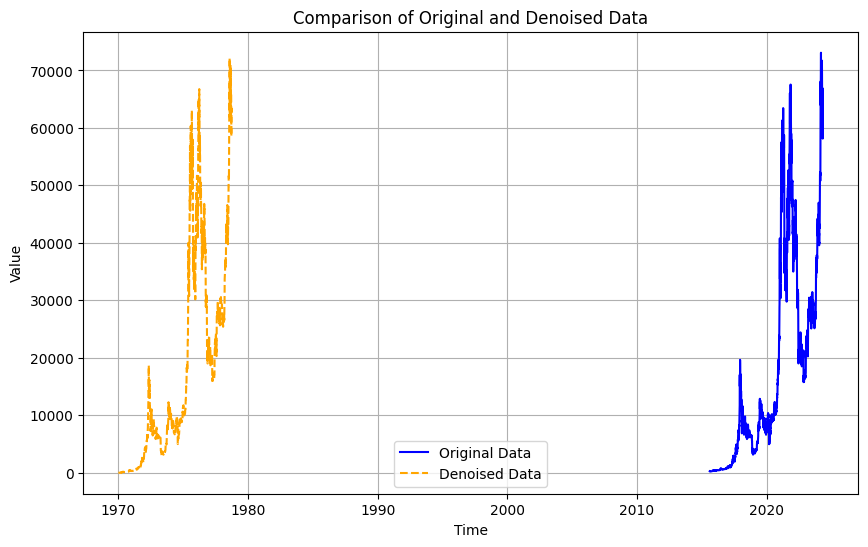

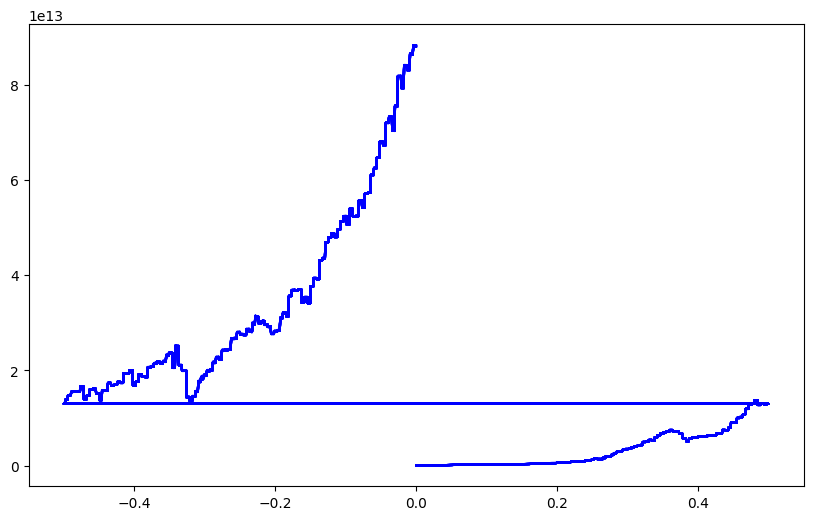

In [10]:
# Wavelet Transform
denoised_df = wavelet_denoise(data, wavelet='db1', level=2, mode='soft', exclude_columns=['Block Difficulty'])
display(denoised_df.head(), denoised_df.tail())

# metrics
# metrics_df = calculate_metrics(data, denoised_df)
# display(metrics_df)

# comaprison plot
plot_comparison(data['BTC Price (USD)'], denoised_df['BTC Price (USD)'])

#frequency response
plot_frequency_response(data, denoised_df)

# DATA PREPARATION

##### Scale, Sequence, Split Functions

In [106]:
# #DEFINE SCALE, SEQUENCE AND SPLIT FUNCTIONS

#RobustScaler
def scale_data(df, train_size=0.8):
    # Train-test split
    split_idx = int(train_size * len(df))  # 80% for training
    train_df = df[:split_idx]
    test_df = df[split_idx:]

    # Scale the train and test data
    scaler = RobustScaler()
    train_scaled = scaler.fit_transform(train_df)
    test_scaled = scaler.transform(test_df)

    # Convert scaled arrays back to DataFrame
    train_scaled_df = pd.DataFrame(train_scaled, columns=df.columns, index=train_df.index)
    test_scaled_df = pd.DataFrame(test_scaled, columns=df.columns, index=test_df.index)

    # Concatenate the scaled data
    scaled_data = pd.concat([train_scaled_df, test_scaled_df])

    #verify data has been properly scaled
    print('------------------------------------------------------------------')
    print("Scaled Features Mean:", np.mean(train_scaled))  # Should be close to 0
    print("Scaled Features Std:", np.std(train_scaled))   # Should be close to 1
    print('------------------------------------------------------------------')

    # data ssummary statistics
    stats = pd.DataFrame(scaled_data)
    summary_stats = stats.describe().transpose()  # Transpose for better readability
    summary_stats.to_csv('X_train_summary_stats.csv', index=True)

    # # outlier detection of feature data
    # plt.figure(figsize=(10, 5))
    # sns.boxplot(data=train_scaled)
    # plt.title('Boxplot of Scaled Features')
    # plt.xlabel('Feature Index')
    # plt.ylabel('Scaled Feature Value')
    # plt.grid(True)
    # plt.savefig()
    # plt.show()

    return scaled_data

def visualize_scaled_data_distribution(df):
  """
  This function takes a pandas DataFrame and visualizes the distribution of features
  using histograms and boxplots to identify outliers and distribution characteristics.
  Parameters:
  - df (pd.DataFrame): The DataFrame containing the feature data for LSTM.
  Returns:
  - None: Plots the figures directly.
  """
  num_features = df.shape[1]  # Get the number of features
  fig, axes = plt.subplots(nrows=num_features, ncols=2, figsize=(15, 5 * num_features))
  fig.suptitle('Feature Distributions and Outliers', fontsize=20, y=1.02)

  for i, col in enumerate(df.columns):
      # Histogram for the distribution
      sns.histplot(df[col], ax=axes[i, 0], kde=True)
      axes[i, 0].set_title(f'Distribution of {col}')
      axes[i, 0].set_xlabel('')
      axes[i, 0].set_ylabel('Frequency')

      # Boxplot for outliers
      sns.boxplot(x=df[col], ax=axes[i, 1])
      axes[i, 1].set_title(f'Outliers in {col}')
      axes[i, 1].set_xlabel('')
      axes[i, 1].set_ylabel('Values')

  plt.tight_layout()

  # Save the plot
  plot_dir = 'scaled_data_plots'
  if not os.path.exists(plot_dir):
      os.makedirs(plot_dir)

  valid_filename = column.replace('/', '_')  # Replace slash with underscore
  plot_filename = f"{plot_dir}/{valid_filename}_boxplot_histogram.png"
  plt.savefig(plot_filename)
  plt.show()
  plt.close()

# Function to create sequences for LSTM forecasting
def create_sequences(input_data, target_index, time_steps, forecast_horizon):
    """
    Create sequences from dataset for LSTM model forecasting.
    Parameters:
    - input_data: The feature data as a numpy array or pandas DataFrame.
    - target_column: The index (for numpy array) or key (for DataFrame) of the target column.
    - sequence_length: The length of the LSTM sequence.
    - forecast_horizon: The number of days to forecast ahead (the target variable).
    Returns:
    - A tuple of numpy arrays (xs, ys) for the features and target.
    """

    input_data = input_data.to_numpy()
    Xs, ys = [], []

    for i in range(len(input_data) - time_steps - forecast_horizon + 1):
        Xs.append(input_data[i:(i + time_steps), :])  # All features columns
        ys.append(input_data[i + time_steps + forecast_horizon - 1, target_index])  # Target column for the price

    return np.array(Xs), np.array(ys), time_steps, forecast_horizon

# Train-test split
def train_test_split(X, y):
  split_idx = int(0.8 * len(X))  # 80% for training
  X_train, X_test = X[:split_idx], X[split_idx:]
  y_train, y_test = y[:split_idx], y[split_idx:]

  print('--------------------------------------------------------------')
  print(f'Shape of Sequened Training Data: X = {X_train.shape}, y = {y_train.shape}')
  print(f'Shape of Sequened Testing Data: X = {X_test.shape}, y = {y_test.shape}')
  print('--------------------------------------------------------------')

  return X_train, X_test, y_train, y_test

##### Prepare Data Function {Input Data==> X_train, X_test, y_train, y_test}

In [12]:
def prepare_data(df, time_steps, forecast_horizon, train_size=0.8):

  #standardize
  scaled_data scaler= scale_data(data)
  #sequence
  target_index = data.columns.get_loc("BTC Price (USD)")
  X, y, time_steps, forecast_horizon = create_sequences(scaled_data, target_index, time_steps, forecast_horizon)
  #split
  X_train, X_test, y_train, y_test = train_test_split(X, y)

  return X, y, X_train, X_test, y_train, y_test

#call function
time_steps = 30
forecast_horizon = 1
X, y, X_train, X_test, y_train, y_test = prepare_data(denoised_df, time_steps, forecast_horizon)

------------------------------------------------------------------
Scaled Features Mean: 0.38987637093691896
Scaled Features Std: 3.4946923178138323
------------------------------------------------------------------
--------------------------------------------------------------
Shape of Sequened Training Data: X = (2528, 30, 39), y = (2528,)
Shape of Sequened Testing Data: X = (632, 30, 39), y = (632,)
--------------------------------------------------------------


##### Feature Selection - Mutual Informatio

In [13]:
# #define feature selection function using mutual information

# def prepare_data_for_MI(data, target_column):
#     # Assuming each column except the target should be used as a feature
#     X = data[[col for col in data.columns if col != target_column]]
#     y = data[target_column]

#     return X, y

# def select_features_by_mutual_information(data, target_column, threshold=0.01):
#     X, y = prepare_data_for_MI(data, target_column)

#     # Make sure y is a 1D array for scikit-learn compatibility
#     y = y.values.ravel()  # Use ravel() to convert y to a 1D array

#     # Calculate mutual information
#     mi_scores = mutual_info_regression(X, y)
#     mi_scores = pd.Series(mi_scores, index=X.columns)

#     # Select features above the threshold
#     selected_features = mi_scores[mi_scores > threshold].index.tolist()

#     return selected_features

# # Example usage
# denoised_features = select_features_by_mutual_information(denoised_df, 'BTC Price (USD)')
# print("Selected features based on mutual information:")
# for i in denoised_features:
#   print(i)

# MODEL ARCHITECTURE

#### Model Builder Class

In [29]:
# create Model Builder class
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import datetime

class LSTMModelBuilder:
    def __init__(self, input_shape):
        self.input_shape = input_shape
        self.layers = layers
        self.model = None
        self.history = None
        self.log_path = 'model_logs.csv'
        self.k_folds = 5  # Example: 5-fold cross-validation

    def build_model(self, optiimizer, layers, units, dropout_rate, output, learning_rate, optimizer='adam', loss='mean_squared_error'):
        optimizer = optimizer
        self.model = Sequential()
        for i in range(layers):
            return_sequences = True if i < layers - 1 else False
            self.model.add(LSTM(units[i], return_sequences=return_sequences, input_shape=self.input_shape))
            self.model.add(Dropout(dropout_rate))
        self.model.add(Dense(output, activation='linear'))
        self.model.compile(optimizer=optimizer, loss=loss)

        self._log_model_params(layers, units, dropout_rate, optimizer, learning_rate, loss)

    def train_model(self, train_data, train_labels, epochs, batch_size, validation_split, callbacks):
        self.history = self.model.fit(
            train_data, train_labels,
            epochs=epochs, batch_size=batch_size,
            validation_split=validation_split,
            verbose=1, callbacks=callbacks)

        self.plot_training_history()
        self._update_log(train_data.shape, epochs, batch_size)

    def train_model_kfold(self, X, y, epochs, batch_size, callbacks):
            tscv = TimeSeriesSplit(n_splits=5)
            val_losses = []
            for kfold_no, (train_index, test_index) in enumerate(tscv.split(X), start=1):
                print(f'Training on fold {kfold_no}...')
                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]

                self.clear_session()
                self.build_model(layers, units, dropout_rate, output, learning_rate)
                self.history = self.model.fit(
                    X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=epochs,
                    batch_size=batch_size,
                    verbose=1,
                    callbacks=callbacks
                )
                val_losses.append(min(self.history.history['val_loss']))

                self.plot_kfold_history(val_losses)
                self._update_log(data.shape, epochs, batch_size, kfold_no)
                kfold_no += 1

    def clear_session(self):
        from tensorflow.keras import backend as K
        K.clear_session()


    def predict(self, test_data, actual_values=None):
        predictions = self.model.predict(test_data)
        if actual_values is not None:
            # predictions = self.scaler.inverse_transform(predictions)  # Inverse transform if necessary
            # actual_values = self.scaler.inverse_transform(actual_values.reshape(-1, 1))
            rmse = np.sqrt(mean_squared_error(actual_values, predictions))
            self._log_predictions(predictions, actual_values, rmse)
            self._plot_predictions(predictions, actual_values, rmse)
        return predictions

    def _log_model_params(self, layers, units, dropout_rate, optimizer, learning_rate, loss):
        params = {
            'layers': layers,
            'units': units,
            'dropout_rate': dropout_rate,
            'optimizer': str(optimizer),
            'learning_rate': learning_rate,
            'loss': loss,
            'timestamp': datetime.datetime.now().isoformat()
        }
        self._write_log(params)

    def _update_log(self, data_shape, epochs, batch_size, fold_no=None):
        update = {
            'data_shape': data_shape,
            'epochs': epochs,
            'batch_size': batch_size,
            'fold_no': fold_no,
            'history_loss': self.history.history['loss'],
            'history_val_loss': self.history.history.get('val_loss', []),
            'timestamp': datetime.datetime.now().isoformat()
        }
        self._write_log(update)

    def _write_log(self, content):
        try:
            df = pd.read_csv(self.log_path)
        except FileNotFoundError:
            df = pd.DataFrame()

        new_entry = pd.DataFrame([content])
        df = pd.concat([df, new_entry], ignore_index=True)
        df.to_csv(self.log_path, index=False)

    def _log_predictions(self, predictions, actual_values, rmse):
        log_data = {
            'predictions': predictions.flatten().tolist(),
            'actual_values': actual_values.flatten().tolist(),
            'rmse': rmse,
            'timestamp': datetime.datetime.now().isoformat()
        }
        df = pd.read_csv(self.log_path)
        new_entry = pd.DataFrame([log_data])
        df = pd.concat([df, new_entry], ignore_index=True)
        df.to_csv(self.log_path, index=False)

    def plot_training_history(self):
        plot_directory = 'mode_training_plot_log'
        os.makedirs(plot_directory, exist_ok=True)
        plt.figure(figsize=(10, 5))
        plt.plot(self.history.history['loss'], label='Training Loss')
        if 'val_loss' in self.history.history:
            plt.plot(self.history.history['val_loss'], label='Validation Loss')
        plt.title(f"Model Training History ({datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')})")
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend()
        plt.grid(True)
        plot_path = os.path.join(
            plot_directory, f"model_training_history_{datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}.png")
        plt.savefig(plot_path)
        plt.show()

    def plot_kfold_history(self, val_losses):
        plot_directory = 'mode_training_plot_log'
        os.makedirs(plot_directory, exist_ok=True)
        plt.figure(figsize=(10, 5))
        plt.plot(self.history.history['loss'], label='Training Loss')
        plt.plot(val_losses, label='Validation Loss per Fold')
        plt.title(f"Kfole Val Losses ({datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')})")
        plt.ylabel('Loss')
        plt.xlabel('Fold')
        plt.legend()
        plt.grid(True)
        plot_path = os.path.join(
            plot_directory, f"model_training_history_{datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}.png")
        plt.savefig(plot_path)
        plt.show()

    def _plot_predictions(self, predictions, actual_values, rmse):
        plot_directory = 'model_predict_plot_log'
        os.makedirs(plot_directory, exist_ok=True)
        plt.figure(figsize=(10, 5))
        plt.plot(actual_values, label='Actual Values')
        plt.plot(predictions, label='Predicted Values', alpha=0.7)
        plt.title(f'Prediction vs Actual Values (RMSE: {rmse:.3f})')
        plt.xlabel('Time Steps')
        plt.ylabel('Values')
        plt.legend()
        plt.grid(True)
        plot_path = os.path.join(
            plot_directory, f"model_predict_plot_log{datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}.png")
        plt.savefig(plot_path)
        plt.show()

### Model 1

------------------------------------------------------------------
Scaled Features Mean: 0.38987637093691896
Scaled Features Std: 3.4946923178138323
------------------------------------------------------------------
--------------------------------------------------------------
Shape of Sequened Training Data: X = (2504, 60, 39), y = (2504,)
Shape of Sequened Testing Data: X = (626, 60, 39), y = (626,)
--------------------------------------------------------------
Epoch 1/300
6/6 [==============================] - 6s 311ms/step - loss: 0.4785 - val_loss: 5.8827
Epoch 2/300
6/6 [==============================] - 1s 131ms/step - loss: 0.4018 - val_loss: 5.5761
Epoch 3/300
6/6 [==============================] - 1s 130ms/step - loss: 0.3581 - val_loss: 5.2978
Epoch 4/300
6/6 [==============================] - 1s 144ms/step - loss: 0.3034 - val_loss: 5.0523
Epoch 5/300
6/6 [==============================] - 1s 114ms/step - loss: 0.2749 - val_loss: 4.8384
Epoch 6/300
6/6 [===================

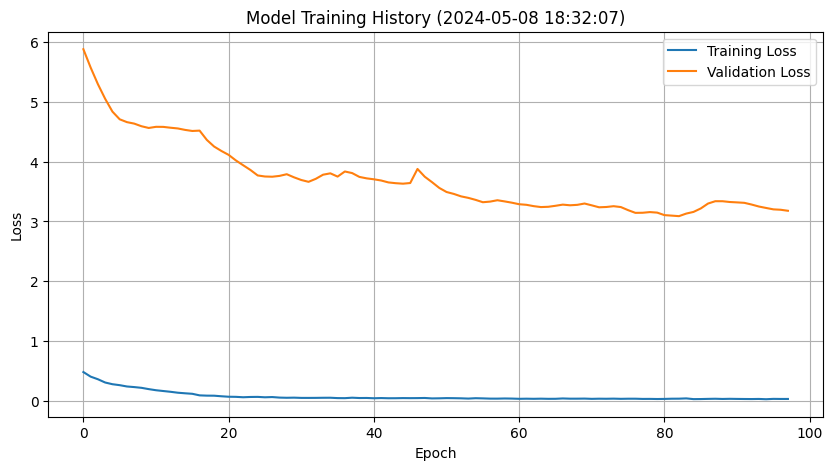

In [90]:
##..............................MODEL_1..............................##
from sklearn.model_selection import TimeSeriesSplit

input_data = denoised_df
n_features = denoised_df.shape[1]
time_steps=60
forecast_horizon=1
train_size=0.8

initial_learning_rate = 0.1
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, verbose=1, restore_best_weights=True)
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate, decay_steps=1000, decay_rate=0.86, staircase=True)


#Build
layers=2
units=[8, 12]
dropout_rate=0.3
output = forecast_horizon

#Train
epochs=300
batch_size= 400
# learning_rate=0.002
validation_split=0.2
callbacks=[early_stopping]
tscv = TimeSeriesSplit(n_splits=5)
optimizer = Adam(learning_rate=lr_schedule, clipnorm=1)

#Data
X, y, X_train, X_test, y_train, y_test = prepare_data(input_data, time_steps, forecast_horizon, train_size)

# Model
input_shape = (time_steps, n_features)
model_builder = LSTMModelBuilder(input_shape)
base_model = model_builder.build_model(optimizer, layers, units, dropout_rate, output, learning_rate)
base_model = model_builder.train_model(X_train, y_train, epochs, batch_size, validation_split, callbacks)
# base_model = model_builder.train_model_kfold( X, y, epochs, batch_size, callbacks)

## Predictions

20/20 [==============================] - 1s 12ms/step


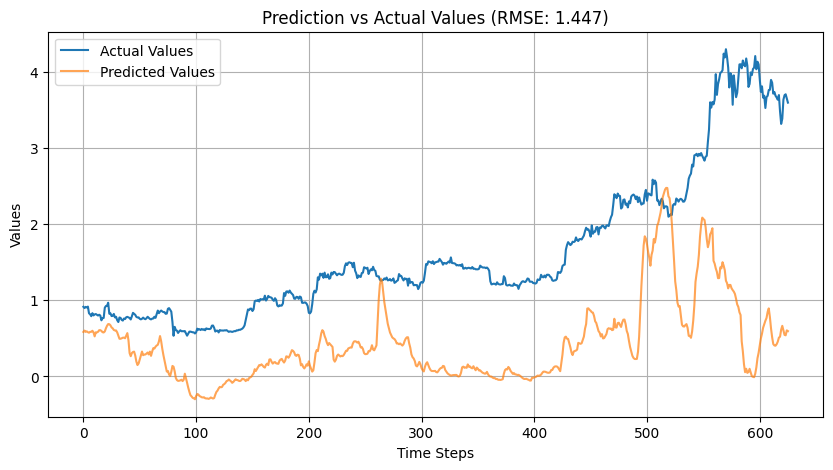

In [99]:
#....................PREDICTIONS....................#
predictions = model_builder.predict(X_test)

In [ ]:
##..............................MODEL_1..............................##
from sklearn.model_selection import TimeSeriesSplit

input_data = denoised_df
n_features = denoised_df.shape[1]
time_steps=60
forecast_horizon=1
train_size=0.8

initial_learning_rate = 0.1
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, verbose=1, restore_best_weights=True)
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate, decay_steps=1000, decay_rate=0.86, staircase=True)


#Build
layers=2
units=[5, 5]
dropout_rate=0.3
output = forecast_horizon

#Train
epochs=300
batch_size= 700
learning_rate=0.006
validation_split=0.2
callbacks=[early_stopping]
tscv = TimeSeriesSplit(n_splits=5)
optimizer = Adam(learning_rate=lr_schedule, clipnorm=1)

#Data
X, y, X_train, X_test, y_train, y_test = prepare_data(input_data, time_steps, forecast_horizon, train_size)

# Model
input_shape = (time_steps, n_features)
model_builder = LSTMModelBuilder(input_shape)
test_model = model_builder.build_model(optimizer, layers, units, dropout_rate, output, learning_rate)
test_model = model_builder.train_model(X_train, y_train, epochs, batch_size, validation_split, callbacks)
# base_model = model_builder.train_model_kfold( X, y, epochs, batch_size, callbacks)

## LSTM Boosting

------------------------------------------------------------------
Scaled Features Mean: 0.38987637093691896
Scaled Features Std: 3.4946923178138323
------------------------------------------------------------------
--------------------------------------------------------------
Shape of Sequened Training Data: X = (2504, 60, 39), y = (2504,)
Shape of Sequened Testing Data: X = (626, 60, 39), y = (626,)
--------------------------------------------------------------
20/20 [==============================] - 0s 18ms/step


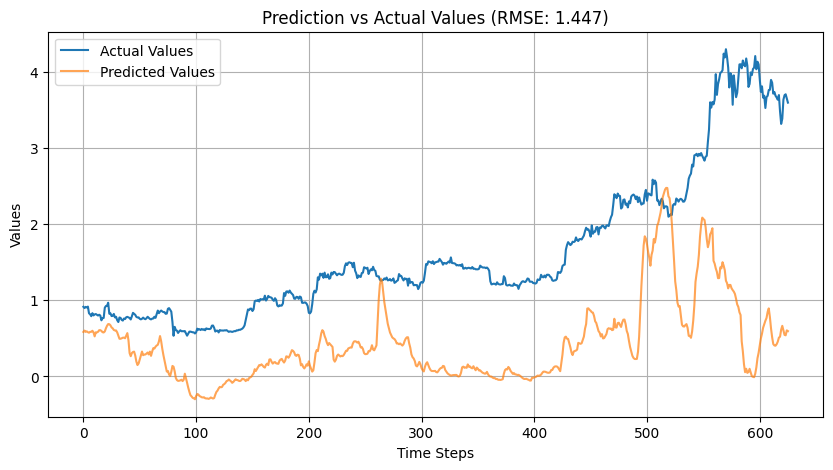

Epoch 1/300
6/6 [==============================] - 7s 267ms/step - loss: 0.5399 - val_loss: 4.7066
Epoch 2/300
6/6 [==============================] - 1s 84ms/step - loss: 0.4374 - val_loss: 4.7920
Epoch 3/300
6/6 [==============================] - 1s 84ms/step - loss: 0.3744 - val_loss: 4.7924
Epoch 4/300
6/6 [==============================] - 1s 85ms/step - loss: 0.3310 - val_loss: 4.7048
Epoch 5/300
6/6 [==============================] - 0s 83ms/step - loss: 0.2932 - val_loss: 4.5233
Epoch 6/300
6/6 [==============================] - 1s 84ms/step - loss: 0.2745 - val_loss: 4.3645
Epoch 7/300
6/6 [==============================] - 0s 84ms/step - loss: 0.2439 - val_loss: 4.2082
Epoch 8/300
6/6 [==============================] - 1s 84ms/step - loss: 0.2260 - val_loss: 4.0495
Epoch 9/300
6/6 [==============================] - 0s 84ms/step - loss: 0.2083 - val_loss: 3.8897
Epoch 10/300
6/6 [==============================] - 1s 87ms/step - loss: 0.1815 - val_loss: 3.7248
Epoch 11/300
6/6 [

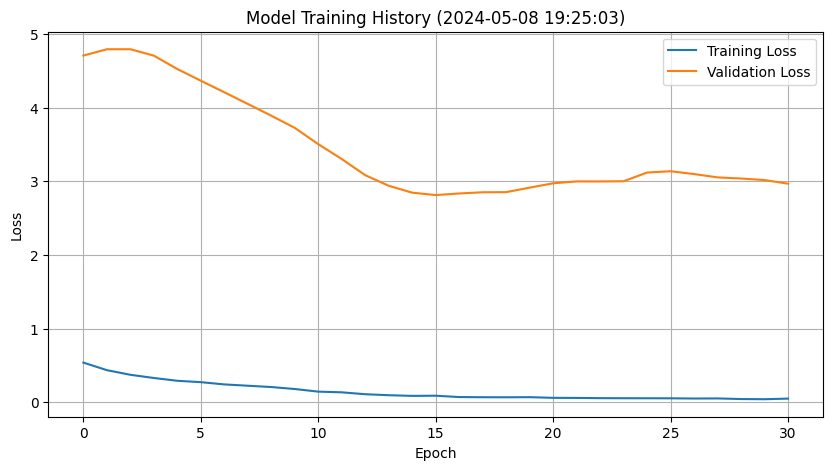

79/79 [==============================] - 1s 12ms/step
Epoch 1/300
6/6 [==============================] - 6s 273ms/step - loss: 0.3725 - val_loss: 4.8304
Epoch 2/300
6/6 [==============================] - 0s 83ms/step - loss: 0.3027 - val_loss: 4.4880
Epoch 3/300
6/6 [==============================] - 0s 84ms/step - loss: 0.2463 - val_loss: 4.0434
Epoch 4/300
6/6 [==============================] - 1s 86ms/step - loss: 0.2135 - val_loss: 3.5180
Epoch 5/300
6/6 [==============================] - 0s 84ms/step - loss: 0.1793 - val_loss: 3.0428
Epoch 6/300
6/6 [==============================] - 0s 82ms/step - loss: 0.1643 - val_loss: 2.7460
Epoch 7/300
6/6 [==============================] - 0s 83ms/step - loss: 0.1464 - val_loss: 2.5662
Epoch 8/300
6/6 [==============================] - 0s 83ms/step - loss: 0.1409 - val_loss: 2.4651
Epoch 9/300
6/6 [==============================] - 1s 88ms/step - loss: 0.1366 - val_loss: 2.3995
Epoch 10/300
6/6 [==============================] - 1s 86ms/ste

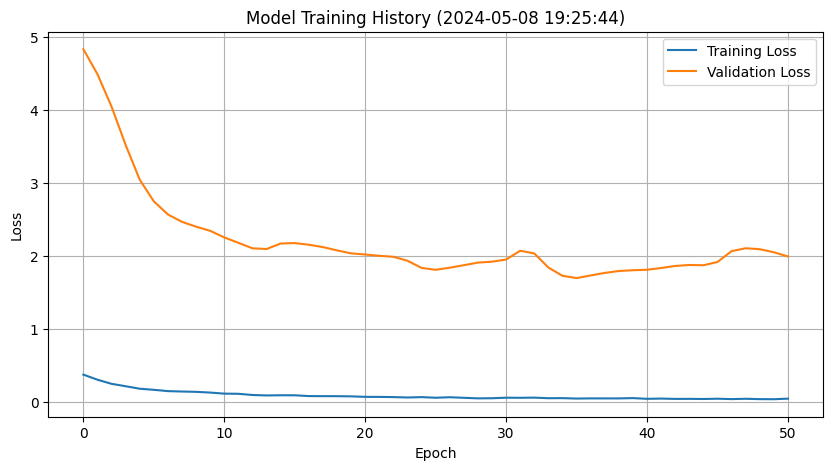

79/79 [==============================] - 1s 12ms/step
Epoch 1/300
6/6 [==============================] - 7s 316ms/step - loss: 0.4452 - val_loss: 5.2831
Epoch 2/300
6/6 [==============================] - 1s 87ms/step - loss: 0.3873 - val_loss: 4.9798
Epoch 3/300
6/6 [==============================] - 1s 84ms/step - loss: 0.3521 - val_loss: 4.5939
Epoch 4/300
6/6 [==============================] - 1s 87ms/step - loss: 0.3072 - val_loss: 4.2327
Epoch 5/300
6/6 [==============================] - 1s 85ms/step - loss: 0.2702 - val_loss: 3.8845
Epoch 6/300
6/6 [==============================] - 1s 90ms/step - loss: 0.2382 - val_loss: 3.6221
Epoch 7/300
6/6 [==============================] - 0s 83ms/step - loss: 0.2243 - val_loss: 3.4158
Epoch 8/300
6/6 [==============================] - 1s 87ms/step - loss: 0.2151 - val_loss: 3.2579
Epoch 9/300
6/6 [==============================] - 0s 83ms/step - loss: 0.1937 - val_loss: 3.1336
Epoch 10/300
6/6 [==============================] - 1s 84ms/ste

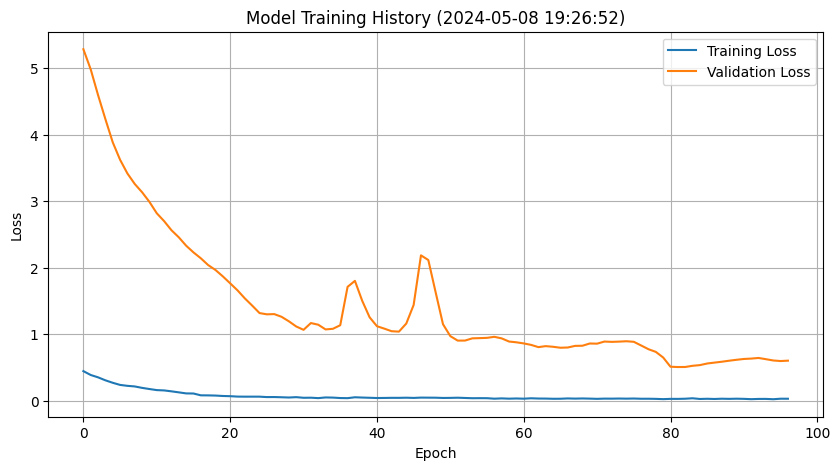

79/79 [==============================] - 1s 12ms/step
Epoch 1/300
6/6 [==============================] - 5s 268ms/step - loss: 0.3444 - val_loss: 3.6281
Epoch 2/300
6/6 [==============================] - 1s 131ms/step - loss: 0.2822 - val_loss: 3.2770
Epoch 3/300
6/6 [==============================] - 1s 145ms/step - loss: 0.2414 - val_loss: 2.8909
Epoch 4/300
6/6 [==============================] - 1s 151ms/step - loss: 0.2134 - val_loss: 2.4874
Epoch 5/300
6/6 [==============================] - 1s 148ms/step - loss: 0.1660 - val_loss: 2.1493
Epoch 6/300
6/6 [==============================] - 1s 136ms/step - loss: 0.1585 - val_loss: 1.9209
Epoch 7/300
6/6 [==============================] - 1s 151ms/step - loss: 0.1221 - val_loss: 1.7467
Epoch 8/300
6/6 [==============================] - 1s 88ms/step - loss: 0.1094 - val_loss: 1.5891
Epoch 9/300
6/6 [==============================] - 1s 88ms/step - loss: 0.0986 - val_loss: 1.4400
Epoch 10/300
6/6 [==============================] - 1s 89

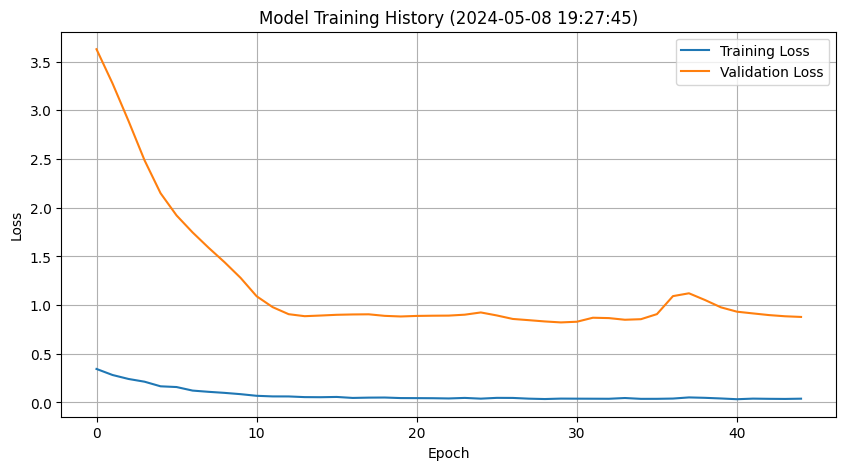

79/79 [==============================] - 1s 16ms/step
Epoch 1/300
6/6 [==============================] - 5s 269ms/step - loss: 0.3926 - val_loss: 5.1526
Epoch 2/300
6/6 [==============================] - 1s 87ms/step - loss: 0.3447 - val_loss: 4.9593
Epoch 3/300
6/6 [==============================] - 1s 87ms/step - loss: 0.3179 - val_loss: 4.7068
Epoch 4/300
6/6 [==============================] - 1s 87ms/step - loss: 0.2863 - val_loss: 4.3639
Epoch 5/300
6/6 [==============================] - 1s 90ms/step - loss: 0.2538 - val_loss: 4.0352
Epoch 6/300
6/6 [==============================] - 1s 87ms/step - loss: 0.2326 - val_loss: 3.7904
Epoch 7/300
6/6 [==============================] - 1s 85ms/step - loss: 0.2147 - val_loss: 3.5979
Epoch 8/300
6/6 [==============================] - 1s 90ms/step - loss: 0.2092 - val_loss: 3.4454
Epoch 9/300
6/6 [==============================] - 1s 88ms/step - loss: 0.1926 - val_loss: 3.3289
Epoch 10/300
6/6 [==============================] - 1s 91ms/ste

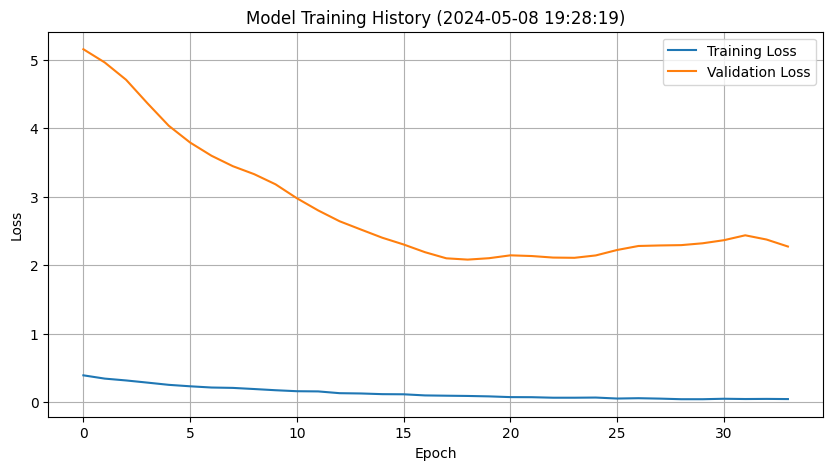

79/79 [==============================] - 1s 13ms/step
Epoch 1/300
6/6 [==============================] - 6s 420ms/step - loss: 0.7051 - val_loss: 5.1790
Epoch 2/300
6/6 [==============================] - 1s 132ms/step - loss: 0.5978 - val_loss: 4.9740
Epoch 3/300
6/6 [==============================] - 1s 143ms/step - loss: 0.5116 - val_loss: 4.7573
Epoch 4/300
6/6 [==============================] - 1s 136ms/step - loss: 0.4290 - val_loss: 4.5855
Epoch 5/300
6/6 [==============================] - 1s 116ms/step - loss: 0.3744 - val_loss: 4.4757
Epoch 6/300
6/6 [==============================] - 1s 85ms/step - loss: 0.3286 - val_loss: 4.4176
Epoch 7/300
6/6 [==============================] - 1s 91ms/step - loss: 0.3057 - val_loss: 4.3724
Epoch 8/300
6/6 [==============================] - 1s 85ms/step - loss: 0.2811 - val_loss: 4.3313
Epoch 9/300
6/6 [==============================] - 1s 91ms/step - loss: 0.2729 - val_loss: 4.2905
Epoch 10/300
6/6 [==============================] - 1s 86ms

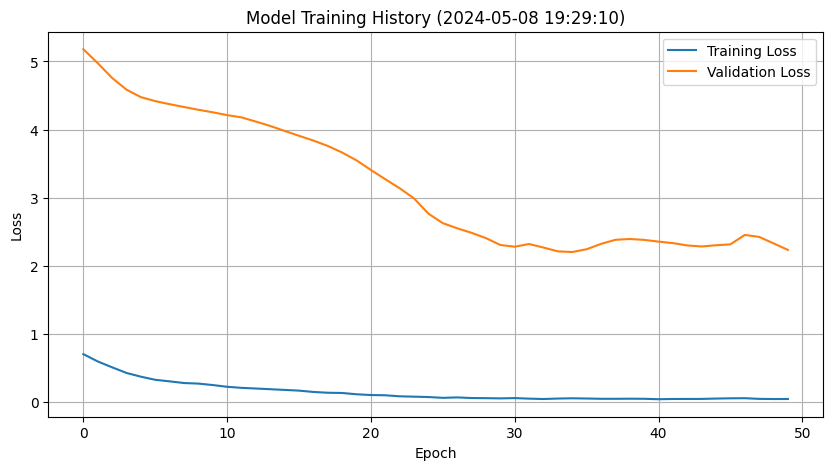

79/79 [==============================] - 1s 15ms/step
Epoch 1/300
6/6 [==============================] - 9s 284ms/step - loss: 0.4168 - val_loss: 6.6960
Epoch 2/300
6/6 [==============================] - 1s 94ms/step - loss: 0.3606 - val_loss: 6.7005
Epoch 3/300
6/6 [==============================] - 1s 90ms/step - loss: 0.3079 - val_loss: 6.7029
Epoch 4/300
6/6 [==============================] - 1s 91ms/step - loss: 0.2765 - val_loss: 6.7272
Epoch 5/300
6/6 [==============================] - 1s 91ms/step - loss: 0.2432 - val_loss: 6.7418
Epoch 6/300
6/6 [==============================] - 1s 91ms/step - loss: 0.2322 - val_loss: 6.7566
Epoch 7/300
6/6 [==============================] - 1s 90ms/step - loss: 0.2092 - val_loss: 6.7664
Epoch 8/300
6/6 [==============================] - 1s 94ms/step - loss: 0.1921 - val_loss: 6.7643
Epoch 9/300
6/6 [==============================] - 1s 132ms/step - loss: 0.1904 - val_loss: 6.7346
Epoch 10/300
6/6 [==============================] - 1s 133ms/s

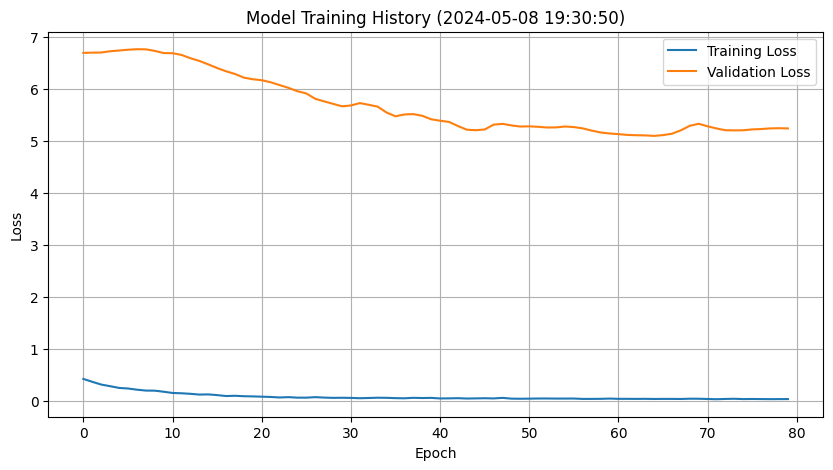

79/79 [==============================] - 1s 16ms/step
Epoch 1/300
6/6 [==============================] - 5s 286ms/step - loss: 0.6444 - val_loss: 5.2353
Epoch 2/300
6/6 [==============================] - 1s 95ms/step - loss: 0.5307 - val_loss: 4.9115
Epoch 3/300
6/6 [==============================] - 1s 89ms/step - loss: 0.4490 - val_loss: 4.6556
Epoch 4/300
6/6 [==============================] - 1s 98ms/step - loss: 0.3949 - val_loss: 4.4185
Epoch 5/300
6/6 [==============================] - 1s 90ms/step - loss: 0.3442 - val_loss: 4.1917
Epoch 6/300
6/6 [==============================] - 1s 94ms/step - loss: 0.3263 - val_loss: 4.0048
Epoch 7/300
6/6 [==============================] - 1s 109ms/step - loss: 0.3140 - val_loss: 3.8264
Epoch 8/300
6/6 [==============================] - 1s 144ms/step - loss: 0.3026 - val_loss: 3.6493
Epoch 9/300
6/6 [==============================] - 1s 147ms/step - loss: 0.2841 - val_loss: 3.4753
Epoch 10/300
6/6 [==============================] - 1s 155ms

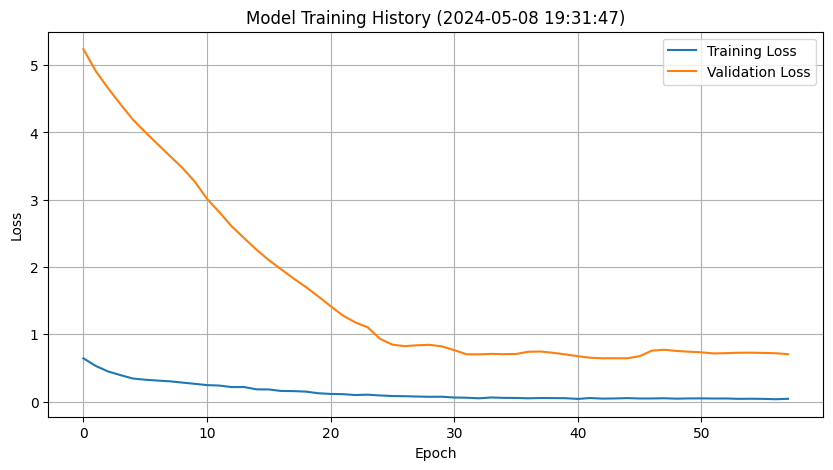

79/79 [==============================] - 1s 18ms/step
Epoch 1/300
6/6 [==============================] - 6s 279ms/step - loss: 0.4834 - val_loss: 5.2758
Epoch 2/300
6/6 [==============================] - 1s 89ms/step - loss: 0.4011 - val_loss: 4.8971
Epoch 3/300
6/6 [==============================] - 1s 88ms/step - loss: 0.3402 - val_loss: 4.5014
Epoch 4/300
6/6 [==============================] - 1s 93ms/step - loss: 0.2968 - val_loss: 4.1524
Epoch 5/300
6/6 [==============================] - 1s 89ms/step - loss: 0.2512 - val_loss: 3.8623
Epoch 6/300
6/6 [==============================] - 1s 90ms/step - loss: 0.2411 - val_loss: 3.6413
Epoch 7/300
6/6 [==============================] - 1s 92ms/step - loss: 0.2105 - val_loss: 3.4582
Epoch 8/300
6/6 [==============================] - 1s 90ms/step - loss: 0.2125 - val_loss: 3.3134
Epoch 9/300
6/6 [==============================] - 1s 89ms/step - loss: 0.1980 - val_loss: 3.1988
Epoch 10/300
6/6 [==============================] - 1s 96ms/ste

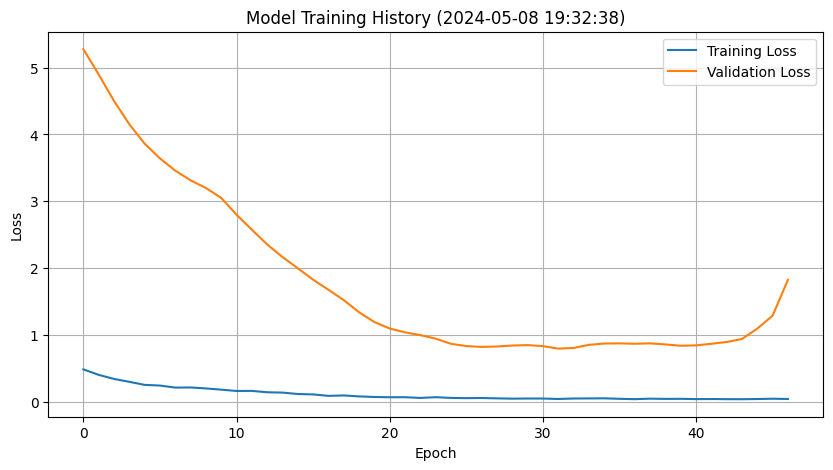

79/79 [==============================] - 1s 13ms/step
Epoch 1/300
6/6 [==============================] - 7s 447ms/step - loss: 0.4426 - val_loss: 6.5966
Epoch 2/300
6/6 [==============================] - 1s 86ms/step - loss: 0.3172 - val_loss: 6.1266
Epoch 3/300
6/6 [==============================] - 1s 93ms/step - loss: 0.2475 - val_loss: 5.7249
Epoch 4/300
6/6 [==============================] - 1s 85ms/step - loss: 0.2136 - val_loss: 5.1973
Epoch 5/300
6/6 [==============================] - 1s 90ms/step - loss: 0.1931 - val_loss: 4.6954
Epoch 6/300
6/6 [==============================] - 1s 88ms/step - loss: 0.1833 - val_loss: 4.5326
Epoch 7/300
6/6 [==============================] - 1s 89ms/step - loss: 0.1489 - val_loss: 4.5777
Epoch 8/300
6/6 [==============================] - 1s 89ms/step - loss: 0.1414 - val_loss: 4.6096
Epoch 9/300
6/6 [==============================] - 1s 89ms/step - loss: 0.1317 - val_loss: 4.4737
Epoch 10/300
6/6 [==============================] - 1s 87ms/ste

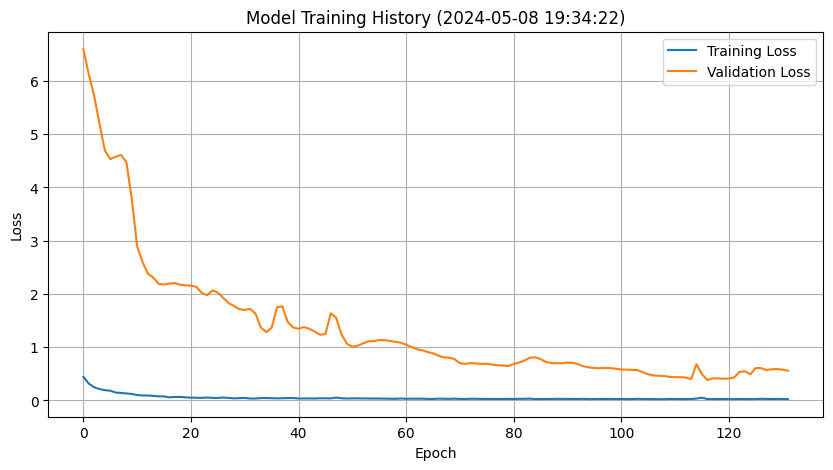

79/79 [==============================] - 1s 13ms/step


In [101]:
#...............................BOOSTED LSTM MODELING#...............................#

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
early_stopping = EarlyStopping(monitor='val_loss', patience=15, verbose=1, restore_best_weights=True)
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate = 0.1, decay_steps=1000, decay_rate=0.86, staircase=True)

#Batch
time_steps=60
forecast_horizon=1
train_size=0.8

#Build
layers=2
units=[8, 12]
dropout_rate=0.3
output = forecast_horizon

#Train
epochs=300
batch_size=400
validation_split=0.2
callbacks=[early_stopping]
optimizer = Adam(learning_rate=lr_schedule, clipnorm=1)

#Data
X, y, X_train, X_test, y_train, y_test = prepare_data(input_data, time_steps, forecast_horizon, train_size)

# Model
input_shape = (time_steps, n_features)
boosted_builder = LSTMModelBuilder(input_shape)


#calculate residuals from previous predictions
initial_predictions = predictions
initial_predictions.flatten()
residuals = y_train - initial_predictions

#stores the ensemble
models = [model_builder.predict(X_test, y_test)]
n_boosting_rounds = 10

for i in range(n_boosting_rounds):

    new_model = boosted_builder.build_model(optimizer, layers, units, dropout_rate, output, learning_rate)
    new_model = boosted_builder.train_model(X_train, y_train, epochs, batch_size, validation_split, callbacks)

    models.append(new_model)

    combined_predictions = np.zeros(y_train.shape)

    for model in models:

        combined_predictions += boosted_builder.predict(X_train).flatten()
        combined_predictions.flatten()

    residuals = y_train - combined_predictions


## Boosted Predictions

In [118]:
#boosted Predictions
final_predictions = np.zeros(y_test.shape)

for model in models:

    final_predictions += boosted_builder.predict(X_test).flatten()
    final_predictions.flatten()

def inverse_standard_scaling(scaled_data, mean, std_dev):
    original_data = scaled_data * std_dev + mean
    return original_data

mean = 0.38987637093691896
std_dev= 3.4946923178138323


Predictions = inverse_standard_scaling(final_predictions, mean, std_dev)
Actual_Values = inverse_standard_scaling(y_test, mean, std_dev)

20/20 [==============================] - 0s 13ms/step


Mean Squared Error: 226.0051916339655
Root Mean Squared Error: 15.03346904855847


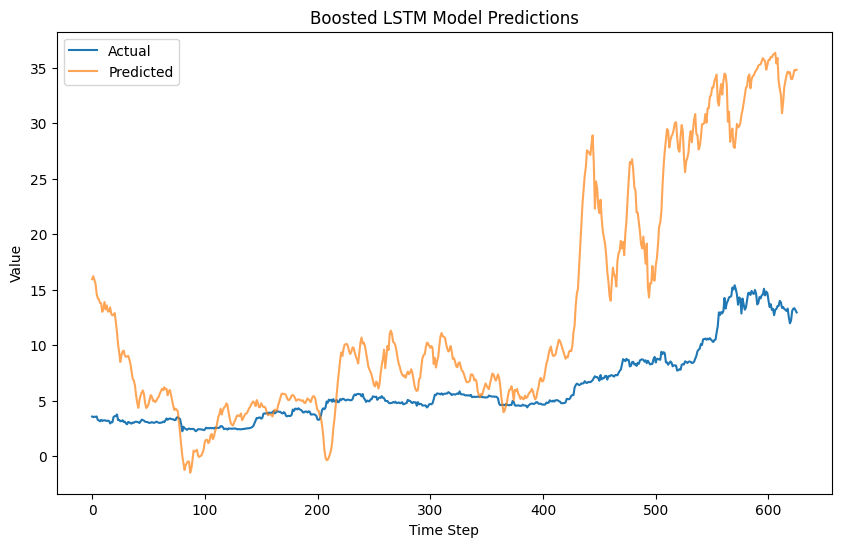

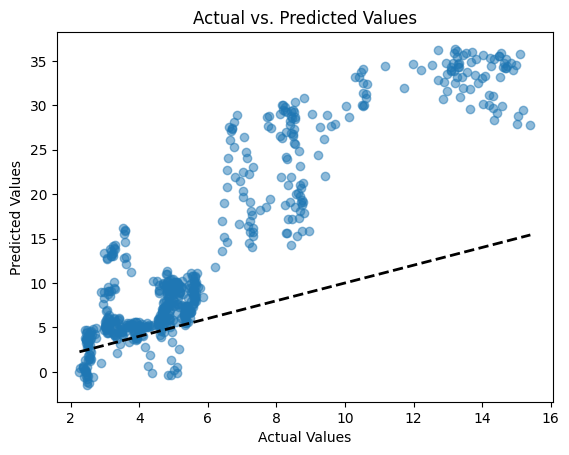

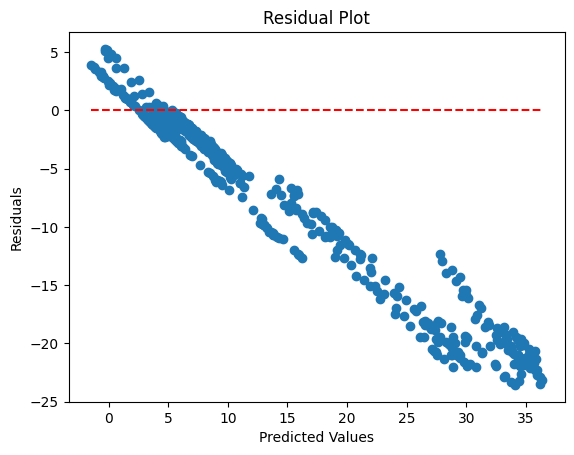

In [120]:
# Plot actual vs predicted values
MSE = mean_squared_error(y_test, final_predictions)
RSME = np.sqrt(MSE)
print("Mean Squared Error:", MSE)
print("Root Mean Squared Error:", RSME)

plt.figure(figsize=(10, 6))
plt.plot(Actual_Values, label='Actual')
plt.plot(final_predictions, label='Predicted', alpha=0.7)
plt.title('Boosted LSTM Model Predictions')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.savefig(f'Boosted LSTM Predictions ({datetime.datetime.now().strftime("%Y-%m-%d")}')
plt.show()

plt.scatter(Actual_Values, final_predictions, alpha=0.5)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([Actual_Values.min(), Actual_Values.max()], [Actual_Values.min(), Actual_Values.max()], 'k--', lw=2)
plt.show()

#residuals plot
residuals = Actual_Values - final_predictions
plt.scatter(final_predictions, residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.hlines(y=0, xmin=final_predictions.min(), xmax=final_predictions.max(), colors='red', linestyles='--')
plt.show()